Fraudulent Job Posting Detection

<b>Group 5<b>



In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('emscad_v1.csv')

<h1>EDA <h1>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

In [3]:
# Load the data and check the first few lines
dataset_path = "emscad_v1.csv" # use your own path

dataset = pd.read_csv(dataset_path)
dataset.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"<h3>We're Food52, and we've created a groundbr...","<p>Food52, a fast-growing, James Beard Award-w...",<ul>\r\n<li>Experience with content management...,NaN,f,t,f,Other,Internship,NaN,NaN,Marketing,f,f
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"<h3>90 Seconds, the worlds Cloud Video Product...",<p>Organised - Focused - Vibrant - Awesome!<br...,<p><b>What we expect from you:</b></p>\r\n<p>Y...,<h3><b>What you will get from us</b></h3>\r\n<...,f,t,f,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f,f
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,<h3></h3>\r\n<p>Valor Services provides Workfo...,"<p>Our client, located in Houston, is actively...",<ul>\r\n<li>Implement pre-commissioning and co...,NaN,f,t,f,NaN,NaN,NaN,NaN,NaN,f,f
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,<p>Our passion for improving quality of life t...,<p><b>THE COMPANY: ESRI – Environmental System...,<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s o...,<p>Our culture is anything but corporate—we ha...,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,f
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,<p>SpotSource Solutions LLC is a Global Human ...,<p><b>JOB TITLE:</b> Itemization Review Manage...,<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>R...,<p>Full Benefits Offered</p>,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,f


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17534 non-null  object
 2   department           6333 non-null   object
 3   salary_range         2868 non-null   object
 4   company_profile      14572 non-null  object
 5   description          17880 non-null  object
 6   requirements         15191 non-null  object
 7   benefits             10684 non-null  object
 8   telecommuting        17880 non-null  object
 9   has_company_logo     17880 non-null  object
 10  has_questions        17880 non-null  object
 11  employment_type      14409 non-null  object
 12  required_experience  10830 non-null  object
 13  required_education   9775 non-null   object
 14  industry             12977 non-null  object
 15  function             11425 non-null  object
 16  frau

In [5]:
dataset.shape

(17880, 18)

## check for missing values and duplicates

In [6]:
#check for duplicate values
number_of_duplicaes = dataset.duplicated().sum()
print('number of duplicated rows is {}'.format(number_of_duplicaes) )

number of duplicated rows is 235


In [7]:
dataset.isna().apply(pd.value_counts)

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
False,17880.0,17534,6333,2868,14572,17880.0,15191,10684,17880.0,17880.0,17880.0,14409,10830,9775,12977,11425,17880.0,17880.0
True,NaN,346,11547,15012,3308,NaN,2689,7196,NaN,NaN,NaN,3471,7050,8105,4903,6455,NaN,NaN


In [8]:
#Check for number of null values
pd.DataFrame(dataset.isnull().sum()).transpose()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
0,0,346,11547,15012,3308,0,2689,7196,0,0,0,3471,7050,8105,4903,6455,0,0


from the above information, we can see that 'salary_range' has a large amount of missing data, which is understandable in this context as job postings may not often include salaries as it can be considered sensitive and confidential data. Due to the large amounts of missing data in 'salary_range', we decided to drop this column, as it is difficult to replace the missing data with mean values or perform analysis if we replace the missing data with 0. 

Similarly, 'department' also has a large amount of missing data, which is also understandable in this context as departments are often connoted with the jobs. However, we believe that it can still be useful in our analysis since one characteristic of fraudulent job posting is the inconsistent information in job posting.
 


##  Distribution of features and check for outliers
check for the number of unique values in each feature

In [9]:
pd.DataFrame(dataset.nunique()).transpose()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
0,11231,3105,1337,874,1710,15095,12119,6510,2,2,2,5,7,13,131,37,2,2


From the above summary, we can see that features 'title', 'description', 'requirements', 'benefits', 'location', 'department', 'salary_range', 'company_profile', 'industry', 'function' have large amounts of unique values. 

In contrast, categorical columns 'employment_type', 'required_experience', 'required_education' have low number of unique values, and can be encoded easily. 

Thus, we decided to explore the distribution of features with respect to the target variables. We chose to visualize the distribution of binary categorical features 'telecommuting', 'has_company_logo', 'has_questions' and categorical features with low dimensionality 'employment_type', 'required_experience' and 'required_education'. 

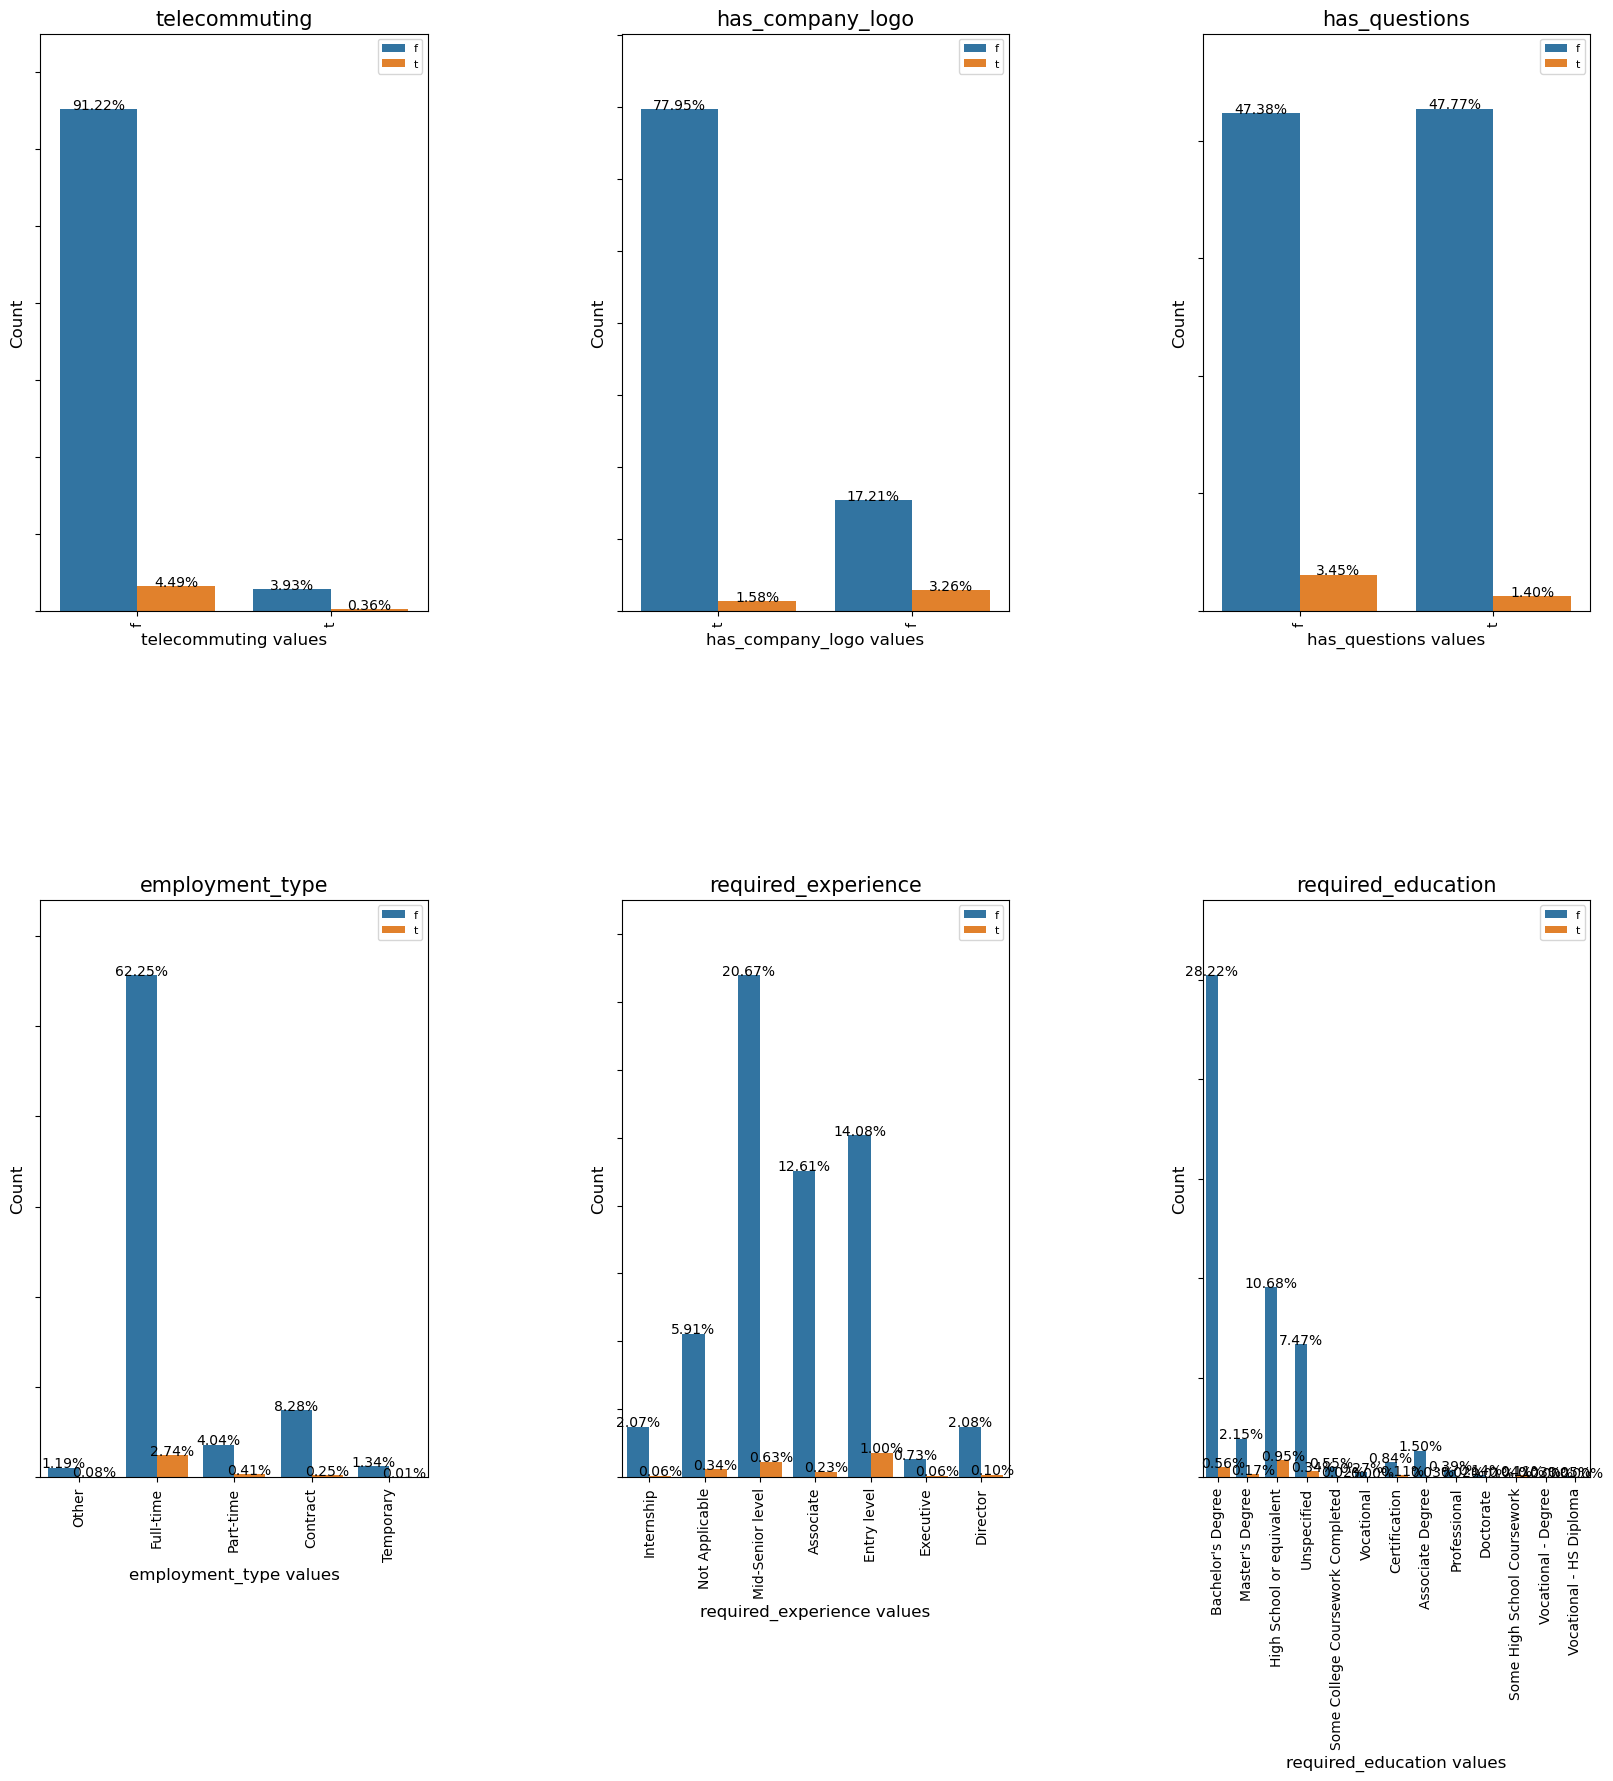

In [10]:

cat_cols = ["telecommuting", "has_company_logo", "has_questions", "employment_type", "required_experience", "required_education",]
# visualizating catagorical variable by target
import matplotlib.gridspec as gridspec # to do the grid of plots
grid = gridspec.GridSpec(3, 3, wspace=0.5, hspace=0.5) # The grid of chart
plt.figure(figsize=(20,30)) # size of figure

# loop to get column and the count of plots
for n, col in enumerate(dataset[cat_cols]): 
    ax = plt.subplot(grid[n]) # feeding the figure of grid
    sns.countplot(x=col, data=dataset, hue='fraudulent') 
    ax.set_ylabel('Count', fontsize=12) # y axis label
    ax.set_title(f'{col}', fontsize=15) # title label
    ax.set_xlabel(f'{col} values', fontsize=12) # x axis label
    xlabels = ax.get_xticklabels() 
    ylabels = ax.get_yticklabels() 
    ax.set_xticklabels(xlabels,  fontsize=10)
    ax.set_yticklabels(ylabels,  fontsize=10)
    plt.legend(fontsize=8)
    plt.xticks(rotation=90) 
    total = len(dataset)
    sizes=[] # Get highest values in y
    for p in ax.patches: # loop to all objects
        height = p.get_height()
        sizes.append(height)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center", fontsize=10) 
    ax.set_ylim(0, max(sizes) * 1.15) #set y limit based on highest heights

plt.show()

<AxesSubplot:>

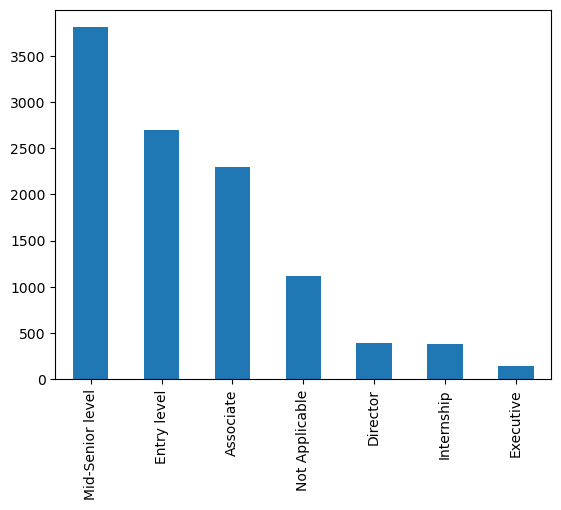

In [11]:
dataset['required_experience'].value_counts().plot(kind = 'bar')


<AxesSubplot:>

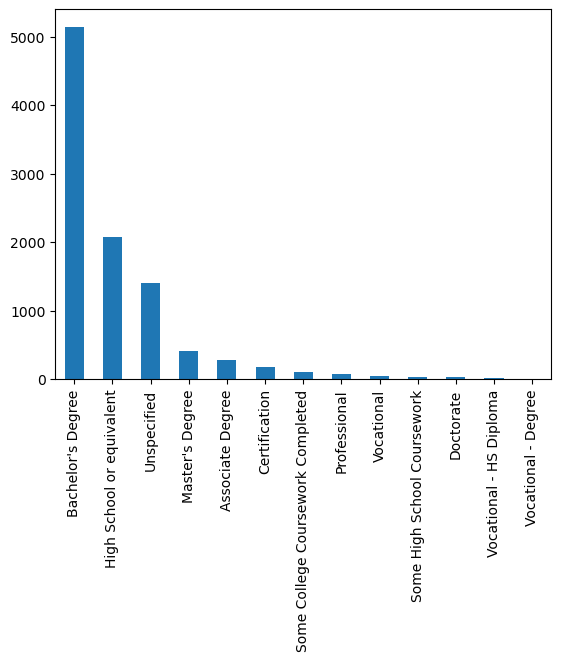

In [12]:
dataset['required_education'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

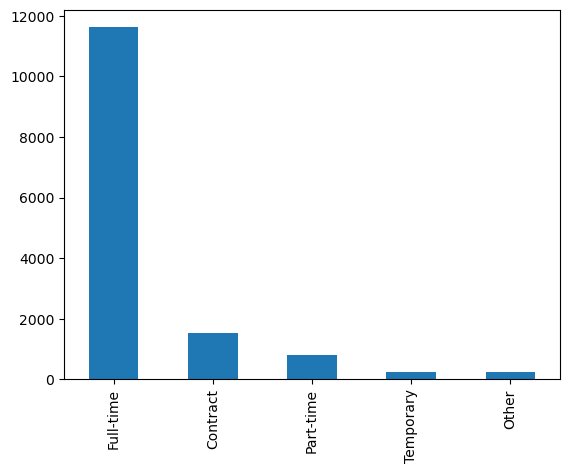

In [13]:
dataset['employment_type'].value_counts().plot(kind = 'bar')

It is rather difficult to eyeball any possible correlation between the features and the target variable. However, we can see that the distribution for fraud and non-fraud classes slightly differ for most of the features with the exception of 'telecommuting'

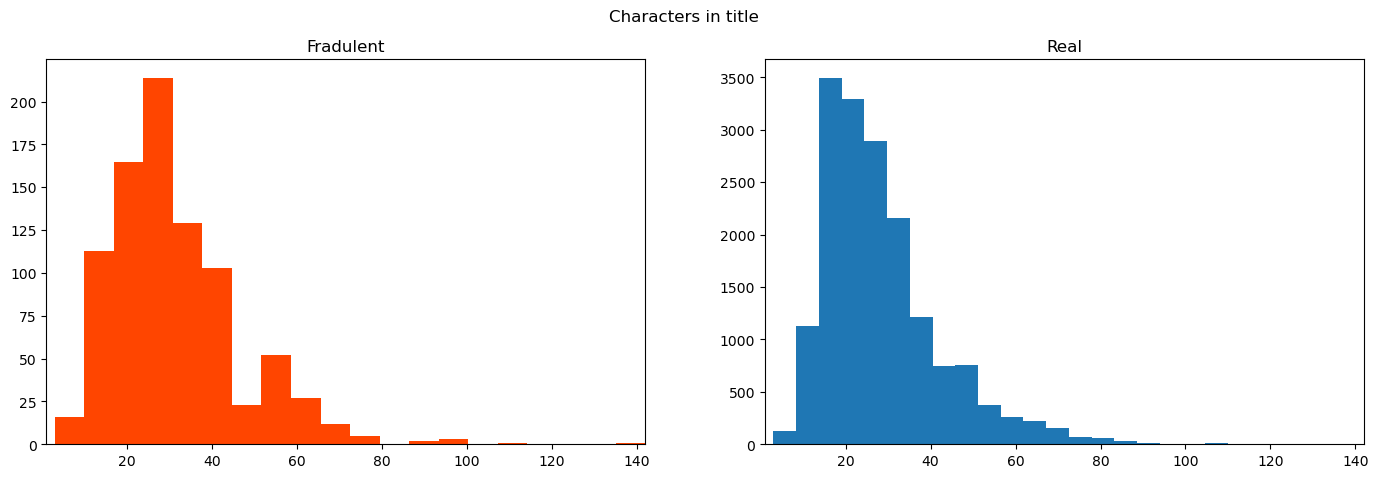

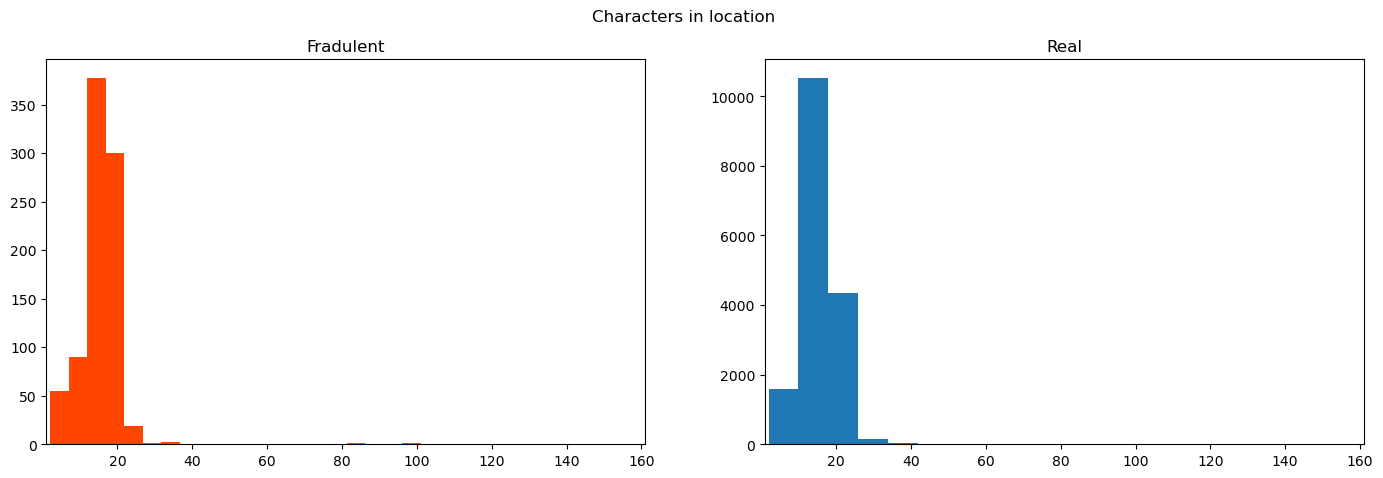

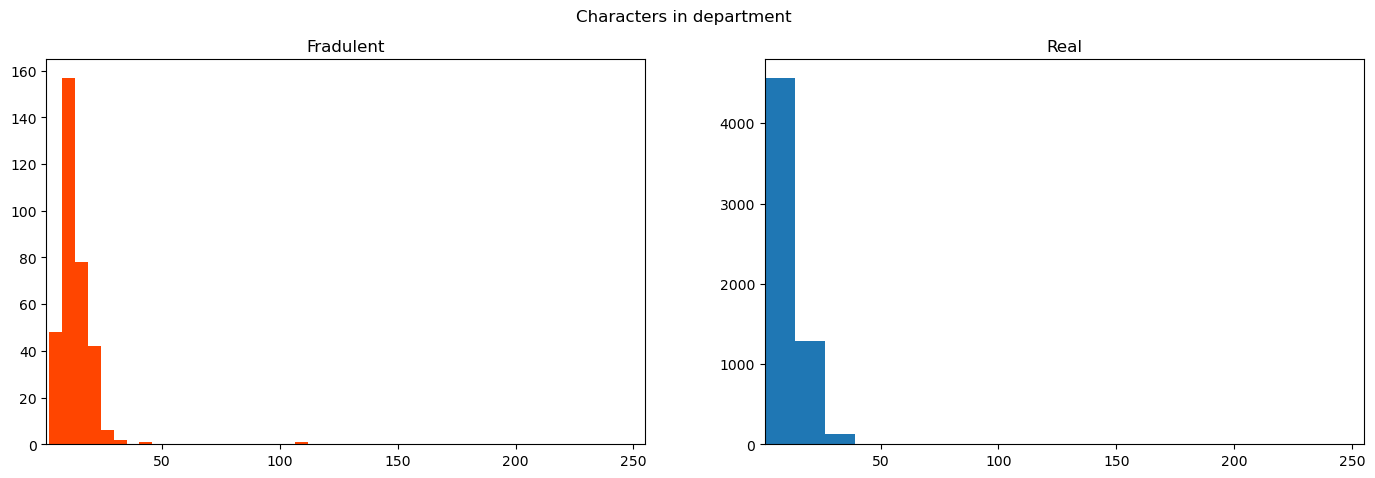

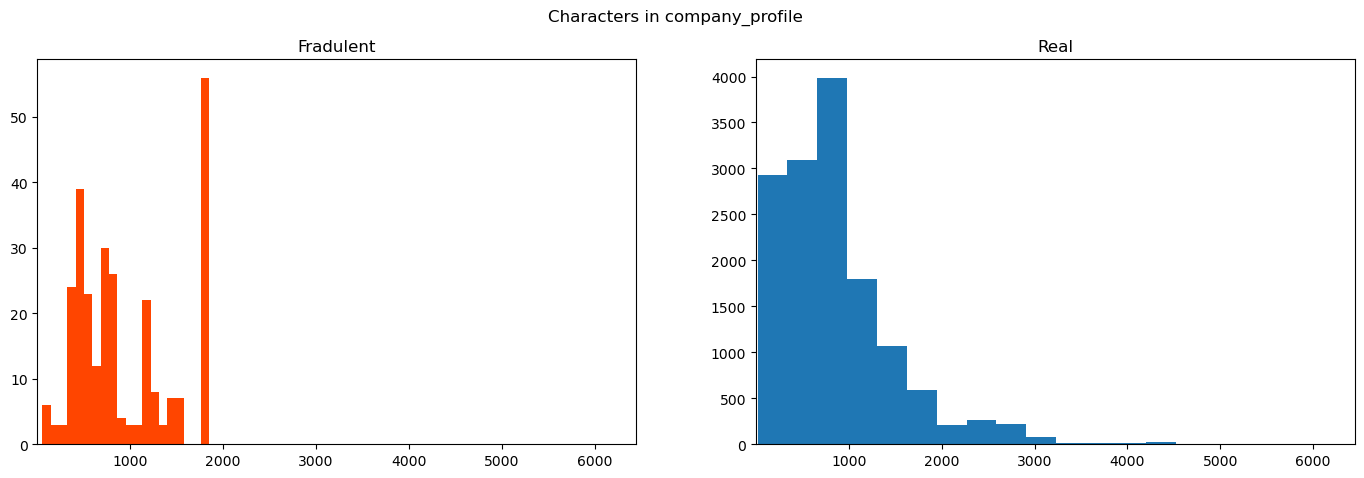

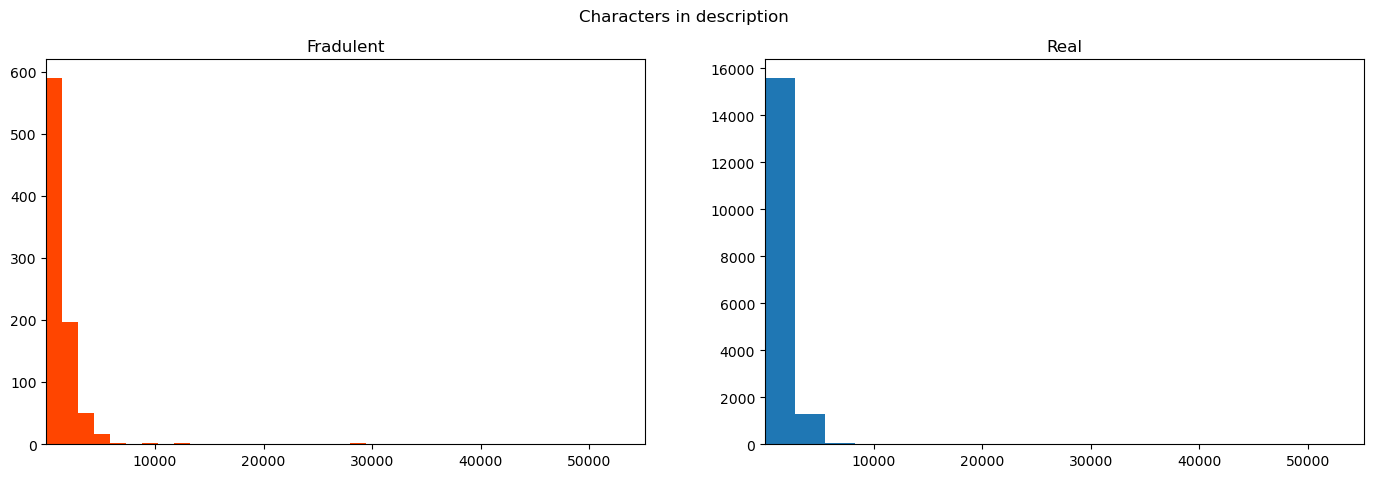

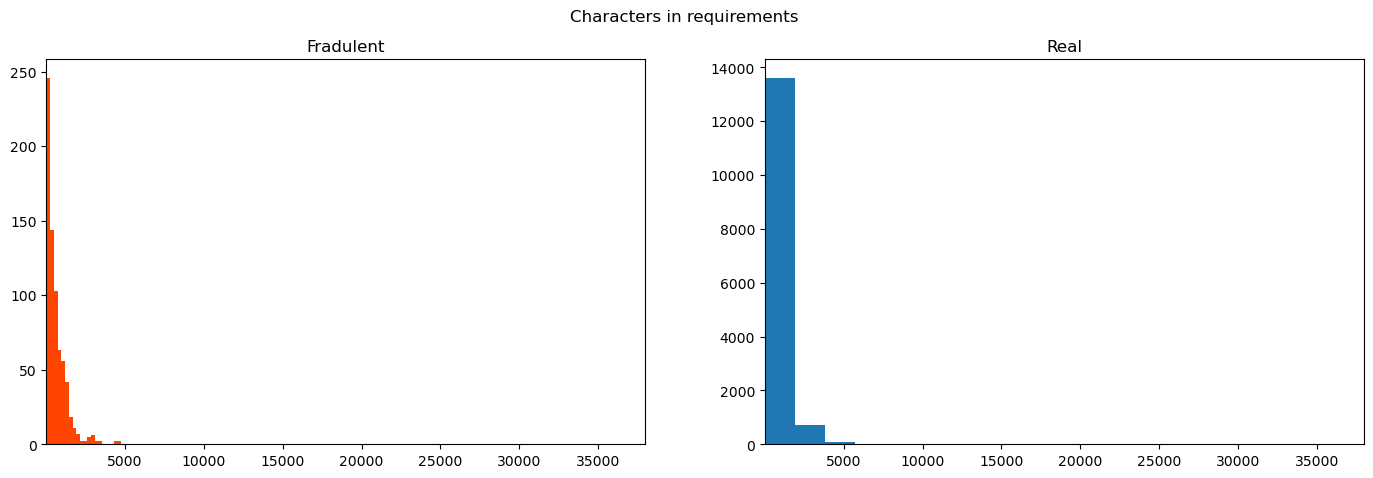

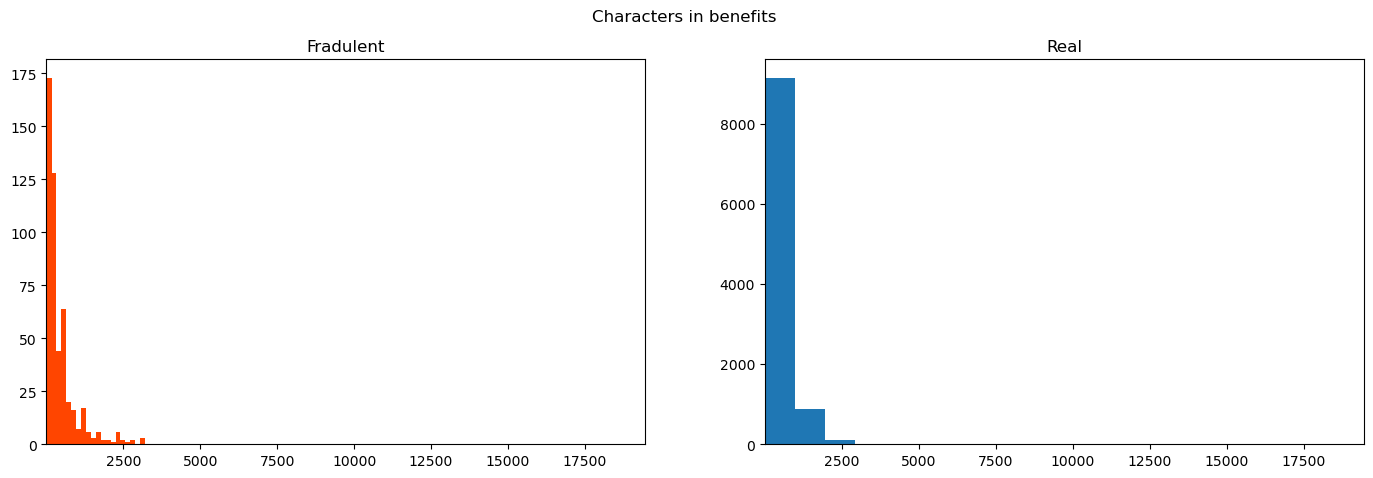

In [14]:
text_Col = ['title', 'location', 'department', 'company_profile',
       'description', 'requirements', 'benefits']
for col in text_Col: 
    fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
    length=dataset[dataset["fraudulent"]== 't'][col].str.len()
    
    ax1.set_xlim(dataset[col].str.len().max())
    ax1.set_xlim(ax1.get_xlim()[::-1])
    ax1.hist(length,bins = 20,color='orangered')
    ax1.set_title('Fradulent')
    length=dataset[dataset["fraudulent"]=='f'][col].str.len()
    ax2.set_xlim(dataset[col].str.len().max())
    ax2.set_xlim(ax2.get_xlim()[::-1])
    ax2.hist(length, bins = 20)
    ax2.set_title('Real')
    fig.suptitle(str.format('Characters in {}', col))
    plt.show()

<h2> Distribution of target variable<h2>

In [15]:
dataset['fraudulent'].value_counts()

f    17014
t      866
Name: fraudulent, dtype: int64

In [16]:

fraud_summary = dataset['fraudulent'].value_counts().to_dict()
fraud_summary

ratio = fraud_summary['f'] / (fraud_summary['t'] + fraud_summary['f'])

print("the ratio of non-fraud vs all transaction is: " + str(round(ratio, 3)))

the ratio of non-fraud vs all transaction is: 0.952


In [17]:
fraud_summary

{'f': 17014, 't': 866}

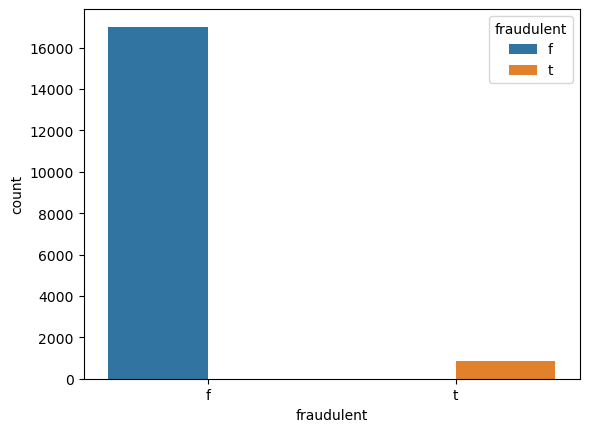

In [18]:
sns.countplot(x = 'fraudulent', hue = 'fraudulent', data = dataset);

# Data preprocessing

In [19]:
data = pd.read_csv('emscad_v1.csv')
data = data.drop('salary_range', axis=1)

In [20]:
# drop duplicates
data.drop_duplicates(inplace=True)
data.duplicated().sum()


0

In [21]:
columns_to_convert = ['telecommuting', 'has_company_logo', 'has_questions', 'fraudulent', 'in_balanced_dataset']
for col in columns_to_convert:
    data[col] = data[col].replace({'t': 1, 'f': 0}).astype(int)
data['employment_type'] = data['employment_type'].replace(np.nan, 'Other')
data['required_experience'] = data['required_experience'].replace(np.nan, 'Not Applicable')
data['required_education'] = data['required_education'].replace(np.nan, 'Unspecified')
data['industry'] = data['industry'].replace(np.nan, 'Other')
data['function'] = data['function'].replace(np.nan, 'Other')

In [22]:
data['missing location'] = data['location'].apply(lambda x: 1 if pd.isna(x) else 0)
data['missing department'] = data['department'].apply(lambda x: 1 if pd.isna(x) else 0)
data['missing company profile'] = data['company_profile'].apply(lambda x: 1 if pd.isna(x) else 0)
data['missing requirements'] = data['requirements'].apply(lambda x: 1 if pd.isna(x) else 0)
data['missing benefits'] = data['benefits'].apply(lambda x: 1 if pd.isna(x) else 0)

In [23]:
import nltk
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
nltk.download('stopwords')
nltk.download('wordnet')
# nltk.download('punkt')
# nltk.download('sentiwordnet')
# from nltk.corpus import sentiwordnet as swn
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re
from bs4 import BeautifulSoup
from sklearn.preprocessing import LabelEncoder




[nltk_data] Downloading package stopwords to /Users/yaoyi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/yaoyi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [24]:
def remove_html_tags(text):
    text = str(text)
    # Parse the HTML using BeautifulSoup
    soup = BeautifulSoup(text, 'html.parser')
    
    # Extract the text content without HTML tags
    text_without_tags = soup.get_text()
    
    # Remove any extra whitespace and newline characters
    text_without_tags = re.sub(r'\s+', ' ', text_without_tags).strip()
    
    return text_without_tags


In [25]:
# replace US with USA
data['location'] = data['location'].str.replace('US', 'USA')

In [26]:
columns_to_count = ['title', 'location', 'department']
for col in columns_to_count:
    data[col] = data[col].replace(np.nan, '')
    data[str.format('{}_length', col)] = data[col].apply(len)

In [27]:
columns_to_count = ['company_profile', 'description', 'requirements']
for col in columns_to_count:
    data[col] = data[col].replace(np.nan, '')
    data[col] = data[col].apply(remove_html_tags)
    data[str.format('{}_length', col)] = data[col].apply(len)

In [28]:
data

,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset,missing location,missing department,missing company profile,missing requirements,missing benefits,title_length,location_length,department_length,company_profile_length,description_length,requirements_length
0,Marketing Intern,"USA, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,Unspecified,Other,Marketing,0,0,0,0,0,0,1,16,17,9,888,908,862
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you: Your key responsibili...,<h3><b>What you will get from us</b></h3>\r\n<...,0,1,0,Full-time,Not Applicable,Unspecified,Marketing and Advertising,Customer Service,0,0,0,0,0,0,0,41,14,7,1289,2072,1439
2,Commissioning Machinery Assistant (CMA),"USA, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,Other,Not Applicable,Unspecified,Other,Other,0,0,0,1,0,0,1,39,14,0,875,355,1377
3,Account Executive - Washington DC,"USA, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",<p>Our culture is anything but corporate—we ha...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,0,0,0,0,0,0,33,19,5,613,2617,1444
4,Bill Review Manager,"USA, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review Manager LOCATION...,QUALIFICATIONS: RN license in the State of Tex...,<p>Full Benefits Offered</p>,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,0,0,1,0,0,0,19,19,0,1632,1445,769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you: Will eat comprehensive S...,<p><b>What can you expect from us?</b></p>\r\n...,0,1,1,Full-time,Mid-Senior level,Unspecified,Computer Software,Sales,0,0,0,0,0,0,0,32,15,5,1715,1437,1271
17876,Payroll Accountant,"USA, PA, Philadelphia",Accounting,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting - Desire to have ...,<p></p>\r\n<h3>Health &amp; Wellness</h3>\r\n<...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,0,0,0,0,0,0,18,21,10,2273,1217,728
17877,Project Cost Control Staff Engineer - Cost Con...,"USA, TX, Houston",,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience. Abi...,NaN,0,0,0,Full-time,Not Applicable,Unspecified,Other,Other,0,0,0,1,0,0,1,59,16,0,228,1301,1240
17878,Graphic Designer,"NG, LA, Lagos",,,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,<p>Competitive salary (compensation will be ba...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0,0,0,1,1,0,0,16,13,0,0,506,494


In [29]:
def preprocess(text):
    text = remove_html_tags(text)
    text = re.sub(pattern='[^a-zA-Z0-9]',repl=' ',string=text)
    text = text.lower()
    tokens = word_tokenize(text)
    stop = set(stopwords.words('english'))
    tokens = [str(word) for word in tokens if word not in stop]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # ps = PorterStemmer()
    # tokens = [ps.stem(word) for word in tokens]
    sentence = ' '.join(tokens)
    return sentence

In [30]:
data['title'] = data['title'].apply(preprocess)
data['location'] = data['location'].apply(preprocess)
data['department'] = data['department'].apply(preprocess)
data['company_profile'] = data['company_profile'].apply(preprocess)
data['description'] = data['description'].apply(preprocess)
data['requirements'] = data['requirements'].apply(preprocess)
data['benefits'] = data['benefits'].apply(preprocess)
data['industry'] = data['industry'].apply(preprocess)
data['function'] = data['function'].apply(preprocess)

In [31]:
label_encoder = LabelEncoder()
columns_to_encode = ['employment_type', 'required_experience', 'required_education']
for col in columns_to_encode:
    data[col] = label_encoder.fit_transform(data[col])
    labels = label_encoder.classes_
    print(col)
    for i in range(len(labels)):
        print(f'{i}: {labels[i]}')

employment_type
0: Contract
1: Full-time
2: Other
3: Part-time
4: Temporary
required_experience
0: Associate
1: Director
2: Entry level
3: Executive
4: Internship
5: Mid-Senior level
6: Not Applicable
required_education
0: Associate Degree
1: Bachelor's Degree
2: Certification
3: Doctorate
4: High School or equivalent
5: Master's Degree
6: Professional
7: Some College Coursework Completed
8: Some High School Coursework
9: Unspecified
10: Vocational
11: Vocational - Degree
12: Vocational - HS Diploma


In [32]:
data['title'] = data['title'].replace('nan', '')
data['location'] = data['location'].replace('nan', '')
data['department'] = data['department'].replace('nan', '')
data['company_profile'] = data['company_profile'].replace('nan', '')
data['description'] = data['description'].replace('nan', '')
data['requirements'] = data['requirements'].replace('nan', '')
data['benefits'] = data['benefits'].replace('nan', '')
data['industry'] = data['industry'].replace('nan', '')
data['function'] = data['function'].replace('nan', '')

In [33]:
data['full_text_length'] = data['title_length'] + data['location_length'] + data['department_length'] + data['company_profile_length'] + data['description_length'] + data['requirements_length']

In [34]:
data


,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset,missing location,missing department,missing company profile,missing requirements,missing benefits,title_length,location_length,department_length,company_profile_length,description_length,requirements_length,full_text_length
0,marketing intern,usa ny new york,marketing,food52 created groundbreaking award winning co...,food52 fast growing james beard award winning ...,experience content management system major plu...,,0,1,0,2,4,9,,marketing,0,0,0,0,0,0,1,16,17,9,888,908,862,2700
1,customer service cloud video production,nz auckland,success,90 second world cloud video production service...,organised focused vibrant awesome passion cust...,expect key responsibility communicate client 9...,get u part 90 second team gain experience work...,0,1,0,1,6,9,marketing advertising,customer service,0,0,0,0,0,0,0,41,14,7,1289,2072,1439,4862
2,commissioning machinery assistant cma,usa ia wever,,valor service provides workforce solution meet...,client located houston actively seeking experi...,implement pre commissioning commissioning proc...,,0,1,0,2,6,9,,,0,0,0,1,0,0,1,39,14,0,875,355,1377,2660
3,account executive washington dc,usa dc washington,sale,passion improving quality life geography heart...,company esri environmental system research ins...,education bachelor master gi business administ...,culture anything corporate collaborative creat...,0,1,0,1,5,1,computer software,sale,0,0,0,0,0,0,0,33,19,5,613,2617,1444,4731
4,bill review manager,usa fl fort worth,,spotsource solution llc global human capital m...,job title itemization review manager location ...,qualification rn license state texas diploma b...,full benefit offered,0,1,1,1,5,1,hospital health care,health care provider,0,0,0,1,0,0,0,19,19,0,1632,1445,769,3884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,account director distribution,ca toronto,sale,vend looking awesome new talent come join u wo...,case first time visited website vend award win...,ace role eat comprehensive statement work brea...,expect u open culture openly share result inpu...,0,1,1,1,5,9,computer software,sale,0,0,0,0,0,0,0,32,15,5,1715,1437,1271,4475
17876,payroll accountant,usa pa philadelphia,accounting,weblinc e commerce platform service provider f...,payroll accountant focus primarily payroll fun...,b b accounting desire fun love genuine passion...,health wellness medical plan prescription drug...,0,1,1,1,5,1,internet,accounting auditing,0,0,0,0,0,0,0,18,21,10,2273,1217,728,4267
17877,project cost control staff engineer cost contr...,usa tx houston,,provide full time permanent position many medi...,experienced project cost control staff enginee...,least 12 year professional experience ability ...,,0,0,0,1,6,9,,,0,0,0,1,0,0,1,59,16,0,228,1301,1240,2844
17878,graphic designer,ng la lagos,,,nemsia studio looking experienced visual graph...,1 must fluent latest version corel adobe cc es...,competitive salary compensation based experien...,0,0,1,0,6,6,graphic design,design,0,0,0,1,1,0,0,16,13,0,0,506,494,1029


In [35]:
data['missing company profile'] = data['company_profile'].apply(lambda x: 1 if (len(x) == 0) else 0)

In [36]:
from sklearn.preprocessing import LabelEncoder

# Create a new column for missing values combination
data['missing_combination'] = ''

# Define conditions for each combination
mask_both_present = (data['has_company_logo'] == 1) & (data['missing company profile'] == 0)
mask_missing_logo = (data['has_company_logo'] == 0) & (data['missing company profile'] == 0)
mask_missing_profile = (data['has_company_logo'] == 1) & (data['missing company profile'] == 1)
mask_both_missing = (data['has_company_logo'] == 0) & (data['missing company profile'] == 1)

# Assign labels based on conditions
data.loc[mask_both_present, 'missing_combination'] = 'Both profile and logo Present'
data.loc[mask_missing_logo, 'missing_combination'] = 'Missing Logo Only'
data.loc[mask_missing_profile, 'missing_combination'] = 'Missing Profile Only'
data.loc[mask_both_missing, 'missing_combination'] = 'Both profile and logo Missing'

# Use one-hot encoding
one_hot_encoded = pd.get_dummies(data['missing_combination'], prefix='missing_combination')


# Convert boolean values to 0 and 1
one_hot_encoded = one_hot_encoded.astype(int)

# Concatenate the one-hot encoded columns with the original dataset
data = pd.concat([data, one_hot_encoded], axis=1)

# Display the resulting DataFrame
print(data[['missing_combination'] + list(one_hot_encoded.columns)])
data

                 missing_combination  \
0      Both profile and logo Present   
1      Both profile and logo Present   
2      Both profile and logo Present   
3      Both profile and logo Present   
4      Both profile and logo Present   
...                              ...   
17875  Both profile and logo Present   
17876  Both profile and logo Present   
17877              Missing Logo Only   
17878  Both profile and logo Missing   
17879  Both profile and logo Present   

       missing_combination_Both profile and logo Missing  \
0                                                      0   
1                                                      0   
2                                                      0   
3                                                      0   
4                                                      0   
...                                                  ...   
17875                                                  0   
17876                                  

,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset,missing location,missing department,missing company profile,missing requirements,missing benefits,title_length,location_length,department_length,company_profile_length,description_length,requirements_length,full_text_length,missing_combination,missing_combination_Both profile and logo Missing,missing_combination_Both profile and logo Present,missing_combination_Missing Logo Only,missing_combination_Missing Profile Only
0,marketing intern,usa ny new york,marketing,food52 created groundbreaking award winning co...,food52 fast growing james beard award winning ...,experience content management system major plu...,,0,1,0,2,4,9,,marketing,0,0,0,0,0,0,1,16,17,9,888,908,862,2700,Both profile and logo Present,0,1,0,0
1,customer service cloud video production,nz auckland,success,90 second world cloud video production service...,organised focused vibrant awesome passion cust...,expect key responsibility communicate client 9...,get u part 90 second team gain experience work...,0,1,0,1,6,9,marketing advertising,customer service,0,0,0,0,0,0,0,41,14,7,1289,2072,1439,4862,Both profile and logo Present,0,1,0,0
2,commissioning machinery assistant cma,usa ia wever,,valor service provides workforce solution meet...,client located houston actively seeking experi...,implement pre commissioning commissioning proc...,,0,1,0,2,6,9,,,0,0,0,1,0,0,1,39,14,0,875,355,1377,2660,Both profile and logo Present,0,1,0,0
3,account executive washington dc,usa dc washington,sale,passion improving quality life geography heart...,company esri environmental system research ins...,education bachelor master gi business administ...,culture anything corporate collaborative creat...,0,1,0,1,5,1,computer software,sale,0,0,0,0,0,0,0,33,19,5,613,2617,1444,4731,Both profile and logo Present,0,1,0,0
4,bill review manager,usa fl fort worth,,spotsource solution llc global human capital m...,job title itemization review manager location ...,qualification rn license state texas diploma b...,full benefit offered,0,1,1,1,5,1,hospital health care,health care provider,0,0,0,1,0,0,0,19,19,0,1632,1445,769,3884,Both profile and logo Present,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,account director distribution,ca toronto,sale,vend looking awesome new talent come join u wo...,case first time visited website vend award win...,ace role eat comprehensive statement work brea...,expect u open culture openly share result inpu...,0,1,1,1,5,9,computer software,sale,0,0,0,0,0,0,0,32,15,5,1715,1437,1271,4475,Both profile and logo Present,0,1,0,0
17876,payroll accountant,usa pa philadelphia,accounting,weblinc e commerce platform service provider f...,payroll accountant focus primarily payroll fun...,b b accounting desire fun love genuine passion...,health wellness medical plan prescription drug...,0,1,1,1,5,1,internet,accounting auditing,0,0,0,0,0,0,0,18,21,10,2273,1217,728,4267,Both profile and logo Present,0,1,0,0
17877,project cost control staff engineer cost contr...,usa tx houston,,provide full time permanent position many medi...,experienced project cost control staff enginee...,least 12 year professional experience ability ...,,0,0,0,1,6,9,,,0,0,0,1,0,0,1,59,16,0,228,1301,1240,2844,Missing Logo Only,0,0,1,0
17878,graphic designer,ng la lagos,,,nemsia studio looking experienced visual graph...,1 must fluent latest version corel adobe cc es...,competitive salary compensation based experien...,0,0,1,0,6,6,graphic design,design,0,0,0,1,1,0,0,16,13,0,0,506,494,1029,Both profile and logo Missing,1,0,0,0


In [37]:
data.to_csv('preprocessed_data_with_num.csv', index=False)

In [38]:
data.columns

Index(['title', 'location', 'department', 'company_profile', 'description',
       'requirements', 'benefits', 'telecommuting', 'has_company_logo',
       'has_questions', 'employment_type', 'required_experience',
       'required_education', 'industry', 'function', 'fraudulent',
       'in_balanced_dataset', 'missing location', 'missing department',
       'missing company profile', 'missing requirements', 'missing benefits',
       'title_length', 'location_length', 'department_length',
       'company_profile_length', 'description_length', 'requirements_length',
       'full_text_length', 'missing_combination',
       'missing_combination_Both profile and logo Missing',
       'missing_combination_Both profile and logo Present',
       'missing_combination_Missing Logo Only',
       'missing_combination_Missing Profile Only'],
      dtype='object')

# Feature selection

## drop duplicates


In [39]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x = data.drop(['fraudulent', 'in_balanced_dataset' ] , axis = 1)
y = data['fraudulent']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3 , random_state = 0)


In [42]:
train_set = x_train.copy()
train_set = train_set.drop(columns= ['missing_combination_Both profile and logo Missing', 'missing_combination_Both profile and logo Present',
       'missing_combination_Missing Logo Only', 'missing_combination_Missing Profile Only', 'full_text_length'])
train_set['fraudulent'] = y_train

                         telecommuting  has_company_logo  has_questions  \
telecommuting                 1.000000         -0.016534       0.009895   
has_company_logo             -0.016534          1.000000       0.226283   
has_questions                 0.009895          0.226283       1.000000   
employment_type              -0.016554         -0.040944      -0.033882   
required_experience          -0.020898         -0.139666      -0.038680   
required_education            0.020233         -0.167008      -0.110666   
missing location              0.019995          0.018949       0.005640   
missing department           -0.015016         -0.119827      -0.137355   
missing company profile       0.061984         -0.701557      -0.144778   
missing requirements         -0.026742         -0.260129      -0.218443   
missing benefits             -0.046987         -0.190914      -0.276186   
title_length                  0.013187          0.001385       0.001290   
location_length          

<AxesSubplot:>

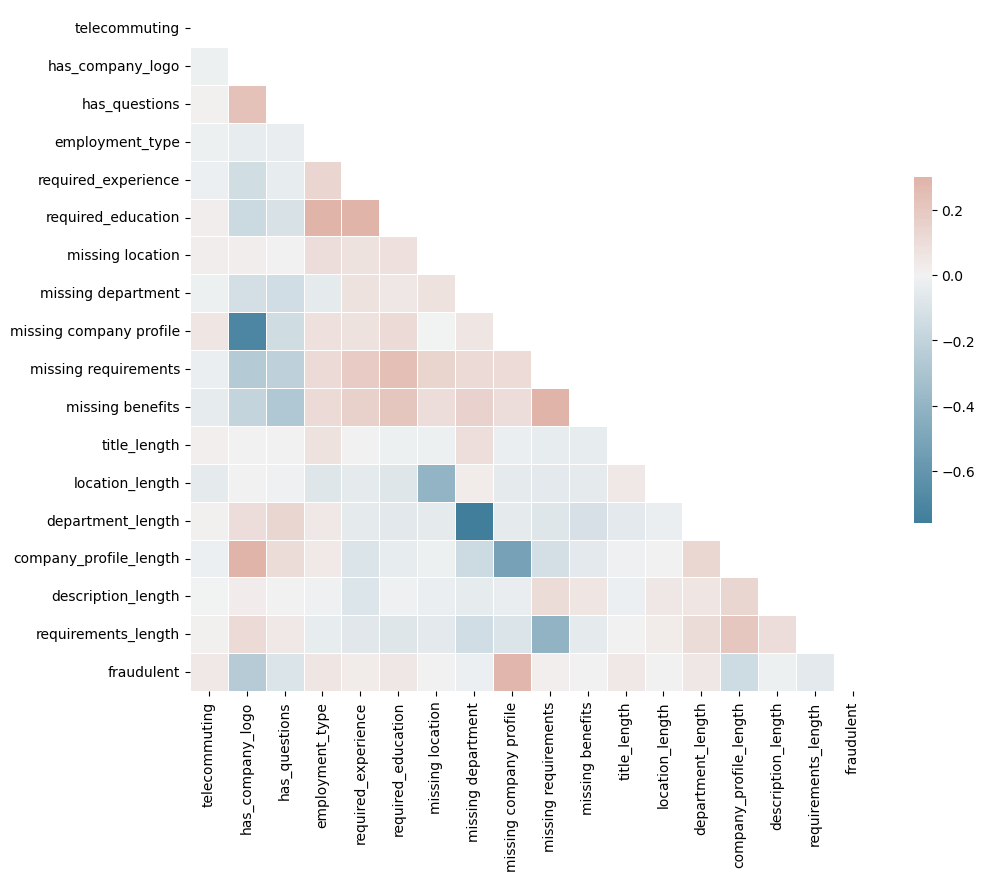

In [43]:
# method 1: correlation plot
corr = train_set.corr()
print(corr)
#Reduce to triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [44]:
corr['fraudulent']

telecommuting              0.040077
has_company_logo          -0.253788
has_questions             -0.090460
employment_type            0.051729
required_experience        0.034635
required_education         0.047503
missing location           0.001651
missing department        -0.022661
missing company profile    0.280380
missing requirements       0.016089
missing benefits          -0.000775
title_length               0.043280
location_length            0.001144
department_length          0.049310
company_profile_length    -0.154782
description_length        -0.015832
requirements_length       -0.056285
fraudulent                 1.000000
Name: fraudulent, dtype: float64

In [45]:
num_features = x_train.loc[:, ['telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'missing company profile',
       'missing location', 'missing department',  'missing requirements','missing benefits',  'title_length', 'location_length', 'department_length', 
       'company_profile_length', 'description_length', 'requirements_length']]
target = y_train


(array([1.89098194e+01, 1.62630880e+02, 5.07669022e+01, 1.40183292e+01,
       1.68014816e+01, 6.32431901e+01, 7.85502091e+02, 3.28412360e-02,
       2.24773495e+00, 2.70221990e+00, 4.40272189e-03, 1.54857545e+02,
       2.96572343e-02, 3.52306485e+02, 1.53742719e+05, 1.91924303e+03,
       2.49193300e+04]), array([1.37045443e-005, 3.01204294e-037, 1.04012980e-012, 1.81037274e-004,
       4.15008877e-005, 1.82698194e-015, 7.65955282e-173, 8.56193711e-001,
       1.33810138e-001, 1.00208631e-001, 9.47096781e-001, 1.50426636e-035,
       8.63270268e-001, 1.33313606e-078, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000]))
missing benefits            9.470968e-01
location_length             8.632703e-01
missing location            8.561937e-01
missing department          1.338101e-01
missing requirements        1.002086e-01
employment_type             1.810373e-04
required_experience         4.150089e-05
telecommuting               1.370454e-05
has_questions               1.040130

<AxesSubplot:>

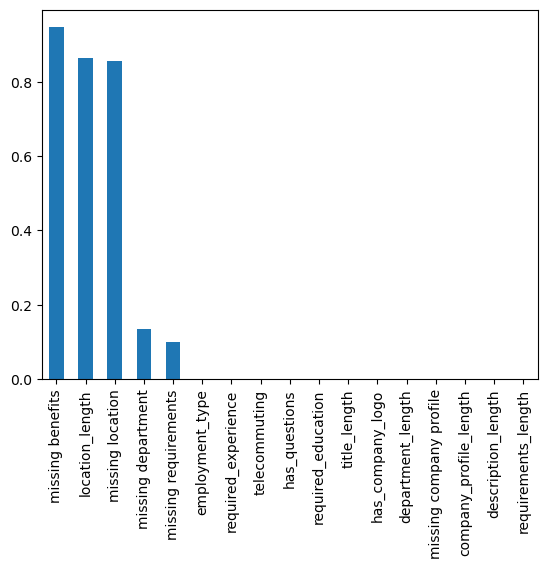

In [46]:
# 4. Feature Selections
# Method 2. Chi-square

from sklearn.feature_selection import chi2
chi_scores = chi2(np.clip(num_features,0,10000000),target) # clip is to ensure no negative values
print(chi_scores)

p_values = pd.Series(chi_scores[1],index = num_features.columns)
p_values.sort_values(ascending = False , inplace = True)

print(p_values)
p_values.plot.bar()


telecommuting              0.000620
has_company_logo           0.025085
has_questions              0.003306
employment_type            0.005107
required_experience        0.003656
required_education         0.006455
missing company profile    0.031869
missing location           0.000000
missing department         0.006551
missing requirements       0.000000
missing benefits           0.001353
title_length               0.008751
location_length            0.008182
department_length          0.007497
company_profile_length     0.085543
description_length         0.038666
requirements_length        0.034781
dtype: float64

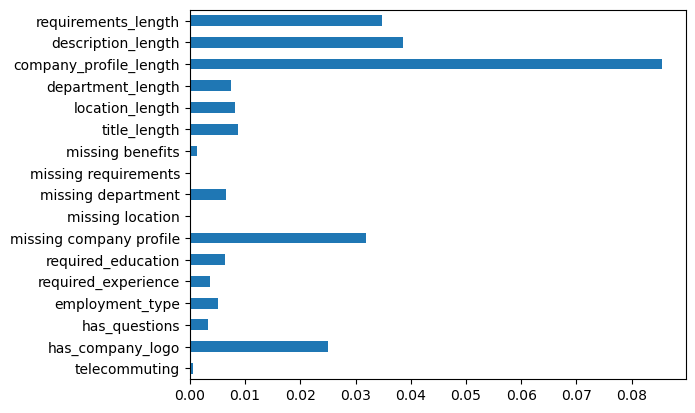

In [47]:
# 4. Feature Selections
# Method 3. Mutual Info Classifier. Estimates mutual information among the features and look at the information gain by each of the variables.
from sklearn.feature_selection import mutual_info_classif
IG = mutual_info_classif(num_features, target,random_state=42)
feature_IG = pd.Series(IG, num_features.columns)
feature_IG.plot(kind = 'barh')
feature_IG  

we have decided to drop all the new features that represent the missing values and the feature 'location length', with the exception of 'missing company profile', as the p-value of chi-square test for these columns are above 0.05. 

In addition, since the feature 'missing company profile' has a correlation with 'has_company_logo' of -0.70, we decided to combine these two features, as: 1. they both represent company-related information in the dataset 2. to reduce dimensionality and multicollinearity in models.

In [48]:
train_set = x_train.copy()
train_set = train_set.drop(columns= ['missing company profile',
       'missing location', 'missing department',  'missing requirements','missing benefits', 'full_text_length', 'location_length',
       'has_company_logo'])
train_set['fraudulent'] = y_train

                                                   telecommuting  \
telecommuting                                           1.000000   
has_questions                                           0.009895   
employment_type                                        -0.016554   
required_experience                                    -0.020898   
required_education                                      0.020233   
title_length                                            0.013187   
department_length                                       0.007176   
company_profile_length                                 -0.019537   
description_length                                     -0.006325   
requirements_length                                     0.007535   
missing_combination_Both profile and logo Missing       0.038210   
missing_combination_Both profile and logo Present      -0.040148   
missing_combination_Missing Logo Only                  -0.029867   
missing_combination_Missing Profile Only        

<AxesSubplot:>

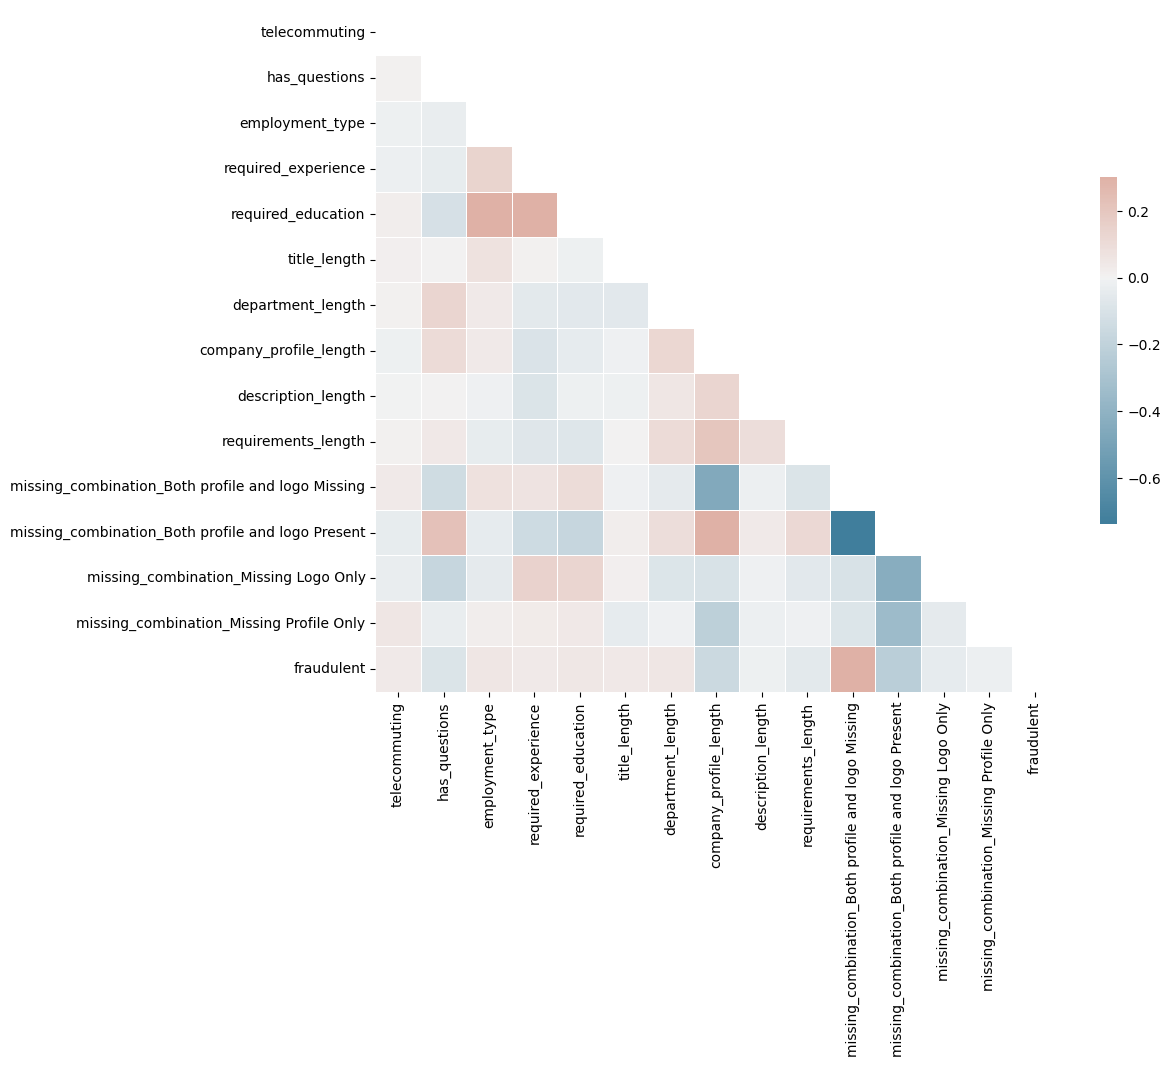

In [49]:
# method 1: correlation plot
corr = train_set.corr()
print(corr)
#Reduce to triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [50]:
corr['fraudulent']

telecommuting                                        0.040077
has_questions                                       -0.090460
employment_type                                      0.051729
required_experience                                  0.034635
required_education                                   0.047503
title_length                                         0.043280
department_length                                    0.049310
company_profile_length                              -0.154782
description_length                                  -0.015832
requirements_length                                 -0.056285
missing_combination_Both profile and logo Missing    0.318668
missing_combination_Both profile and logo Present   -0.229257
missing_combination_Missing Logo Only               -0.046794
missing_combination_Missing Profile Only            -0.022035
fraudulent                                           1.000000
Name: fraudulent, dtype: float64

In [51]:
num_features = x_train.loc[:, ['telecommuting',  'has_questions', 'employment_type',
       'required_experience', 'required_education', 'missing company profile',
       'missing_combination_Both profile and logo Missing', 'missing_combination_Both profile and logo Present', 'missing_combination_Missing Logo Only', 
       'missing_combination_Missing Profile Only',  'title_length',  'department_length', 
       'company_profile_length', 'description_length', 'requirements_length']]
target = y_train


(array([1.89098194e+01, 5.07669022e+01, 1.40183292e+01, 1.68014816e+01,
       6.32431901e+01, 7.85502091e+02, 1.06169872e+03, 1.57045762e+02,
       2.53657578e+01, 5.73867741e+00, 1.54857545e+02, 3.52306485e+02,
       1.53742719e+05, 1.91924303e+03, 2.49193300e+04]), array([1.37045443e-005, 1.04012980e-012, 1.81037274e-004, 4.15008877e-005,
       1.82698194e-015, 7.65955282e-173, 6.97562668e-233, 5.00207582e-036,
       4.74262319e-007, 1.65952843e-002, 1.50426636e-035, 1.33313606e-078,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000]))
missing_combination_Missing Profile Only              1.659528e-02
employment_type                                       1.810373e-04
required_experience                                   4.150089e-05
telecommuting                                         1.370454e-05
missing_combination_Missing Logo Only                 4.742623e-07
has_questions                                         1.040130e-12
required_education                        

<AxesSubplot:>

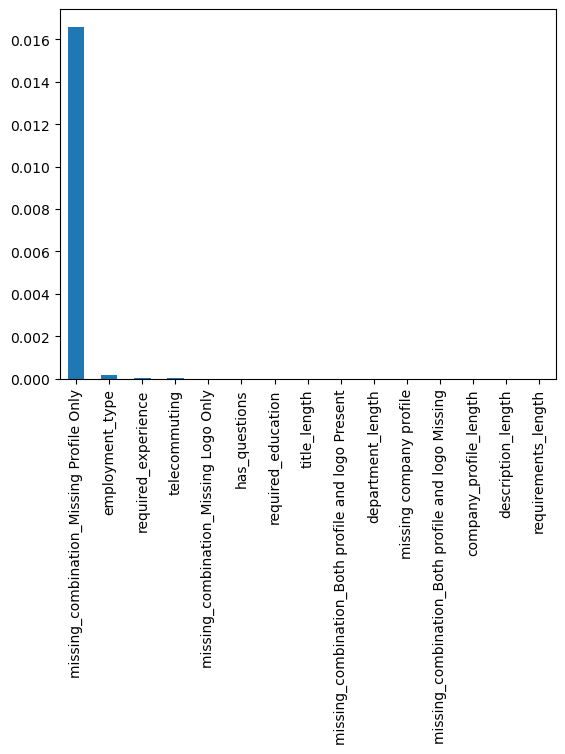

In [52]:
# 4. Feature Selections
# Method 2. Chi-square

from sklearn.feature_selection import chi2
chi_scores = chi2(np.clip(num_features,0,10000000),target) # clip is to ensure no negative values
print(chi_scores)

p_values = pd.Series(chi_scores[1],index = num_features.columns)
p_values.sort_values(ascending = False , inplace = True)

print(p_values)
p_values.plot.bar()


telecommuting                                        0.000207
has_questions                                        0.003452
employment_type                                      0.004148
required_experience                                  0.005647
required_education                                   0.008718
missing company profile                              0.030324
missing_combination_Both profile and logo Missing    0.032373
missing_combination_Both profile and logo Present    0.027727
missing_combination_Missing Logo Only                0.004029
missing_combination_Missing Profile Only             0.001845
title_length                                         0.008314
department_length                                    0.008514
company_profile_length                               0.085663
description_length                                   0.038839
requirements_length                                  0.031167
dtype: float64

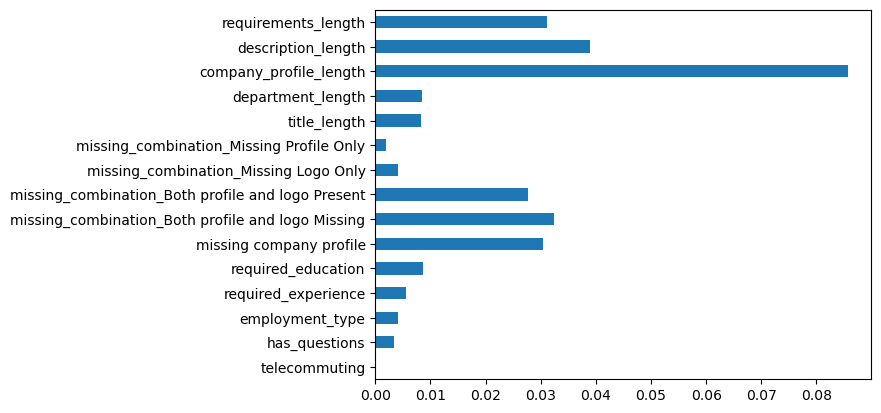

In [53]:
# 4. Feature Selections
# Method 3. Mutual Info Classifier. Estimates mutual information among the features and look at the information gain by each of the variables.
from sklearn.feature_selection import mutual_info_classif
IG = mutual_info_classif(num_features, target,random_state=42)
feature_IG = pd.Series(IG, num_features.columns)
feature_IG.plot(kind = 'barh')
feature_IG  

In [54]:
num_features = x_train.loc[:, [ 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'missing company profile',
       'missing_combination_Both profile and logo Missing', 'missing_combination_Both profile and logo Present', 'missing_combination_Missing Logo Only', 
       'missing_combination_Missing Profile Only',  'title_length',  'department_length', 
       'company_profile_length', 'description_length', 'requirements_length']]
target = y_train


has_questions                                        0.004965
employment_type                                      0.001981
required_experience                                  0.003318
required_education                                   0.007097
missing company profile                              0.030230
missing_combination_Both profile and logo Missing    0.035134
missing_combination_Both profile and logo Present    0.024997
missing_combination_Missing Logo Only                0.001333
missing_combination_Missing Profile Only             0.001396
title_length                                         0.011252
department_length                                    0.004948
company_profile_length                               0.086162
description_length                                   0.038970
requirements_length                                  0.036044
dtype: float64

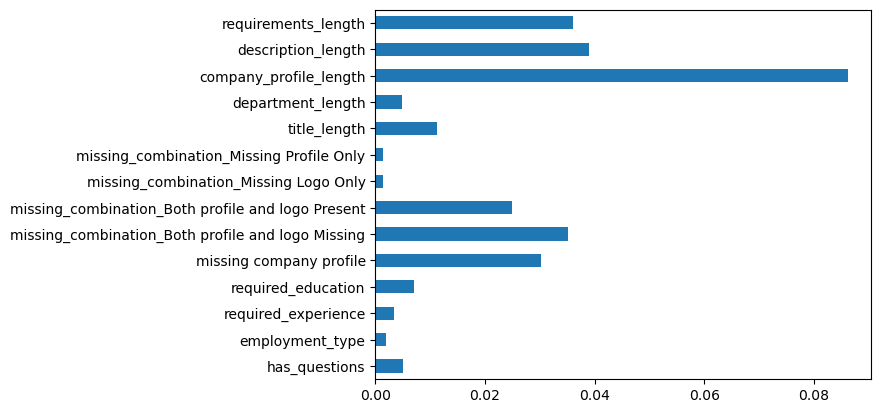

In [55]:
# 4. Feature Selections
# Method 3. Mutual Info Classifier. Estimates mutual information among the features and look at the information gain by each of the variables.
from sklearn.feature_selection import mutual_info_classif
IG = mutual_info_classif(num_features, target,random_state=42)
feature_IG = pd.Series(IG, num_features.columns)
feature_IG.plot(kind = 'barh')
feature_IG  

Therefore, we decided to remove 'location_length' as it does not provide much information gain and more importantly, based on the chi-sqaure test, it shows independency with the target variable.

From information gain, we can see that 'telecommuting' has neglegible information gain (with value of 0). Therefore, we drop telecommuting as a result. 

<b> Therefore, we decided to remove features 'telecommuting' as it does not provide much information gain  In addition, our one-hot encoded column combines information from 'has_company_logo' with the presence of 'company_profile' value (the value is not null). Thus, we will not include 'has_company_logo' for our models in this section.<b>

final features selected: 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'missing company profile',
       'missing_combination_Both profile and logo Missing', 'missing_combination_Both profile and logo Present', 'missing_combination_Missing Logo Only', 
       'missing_combination_Missing Profile Only',  'title_length',  'department_length', 
       'company_profile_length', 'description_length', 'requirements_length'

# model construction and evaluation

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from gensim.models import Word2Vec
from gensim.models.doc2vec import TaggedDocument, Doc2Vec
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
# combine all text
data['full_text'] = data['title'] + " " + data['location']  + " " + data['department']  + " " + data['company_profile']  + " " + data['description']  + " " + data['requirements']  + " "  + data['benefits'] + data['industry']  + " " + data['function']

<h1> Models with categorical and numerical features</h1>

In [58]:
X_train_full, X_test_full,y_train , y_test = train_test_split(data.drop('fraudulent', axis=1), data["fraudulent"], test_size=0.3, random_state=0)
# random_state set as 0 for reproducible splits

In [59]:
train_set = X_train_full.copy()
train_set['fraudulent'] = y_train

In [60]:
x_train_selected = X_train_full.loc[:, [ 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'missing_combination_Both profile and logo Missing', 'missing_combination_Both profile and logo Present',
       'missing_combination_Missing Logo Only', 'missing_combination_Missing Profile Only',
       'title_length', 'department_length',
       'company_profile_length', 'description_length', 'requirements_length']]

x_test_selected = X_test_full.loc[:, [ 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'missing_combination_Both profile and logo Missing', 'missing_combination_Both profile and logo Present',
       'missing_combination_Missing Logo Only', 'missing_combination_Missing Profile Only',
       'title_length', 'department_length',
       'company_profile_length', 'description_length', 'requirements_length']]

Logistic regression model

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


classification_report = pd.DataFrame(columns=['Accuracy','F1_score','Precision','Recall'])

model = LogisticRegression(max_iter= 2500)
#max_iter is set as the model fails to converge when the number is too low. 
model = model.fit(x_train_selected , y_train)
for i in range(2) :
    if i == 0 :
        to_pred = x_train_selected
        pred = y_train
        title = 'Train'
        
    else :
        to_pred = x_test_selected
        pred = y_test
        title = 'Test'
    # Assuming 'model' is your trained logistic regression model
    threshold = 0.10  # Adjust the threshold as needed
    y_pred = (model.predict_proba(to_pred)[:, 1] > threshold).astype(int)

    # y_pred = model.predict(to_pred)

    acc = accuracy_score(pred , y_pred)
    f1 = f1_score(pred , y_pred)
    prec = precision_score(pred , y_pred)
    recall = recall_score(pred , y_pred)
    d = pd.DataFrame(data=np.array([acc,f1,prec,recall]).reshape(1,4) 
                    , columns=['Accuracy' , 'F1_score' , 'Precision' , 'Recall'])  
    classification_report = pd.concat([classification_report , d])
    classification_report.rename( index= { 0 :'{} _ {} Details'.format(model , title) } ,inplace=True )

classification_report

,Accuracy,F1_score,Precision,Recall
LogisticRegression(max_iter=2500) _ Train Details,0.871764,0.334038,0.225973,0.640194
LogisticRegression(max_iter=2500) _ Test Details,0.879202,0.347023,0.230559,0.701245


SVM

In [62]:

classification_report = pd.DataFrame(columns=['Accuracy','F1_score','Precision','Recall'])

model = SVC(probability= True)
model = model.fit(x_train_selected , y_train)
for i in range(2) :
    if i == 0 :
        to_pred = x_train_selected
        pred = y_train
        title = 'Train'
        
    else :
        to_pred = x_test_selected
        pred = y_test
        title = 'Test'
    threshold = 0.10  # Adjust the threshold as needed
    y_pred = (model.predict_proba(to_pred)[:, 1] > threshold).astype(int)

    acc = accuracy_score(pred , y_pred)
    f1 = f1_score(pred , y_pred)
    prec = precision_score(pred , y_pred)
    recall = recall_score(pred , y_pred)
    d = pd.DataFrame(data=np.array([acc,f1,prec,recall]).reshape(1,4) 
                    , columns=['Accuracy' , 'F1_score' , 'Precision' , 'Recall'])  
    classification_report = pd.concat([classification_report , d])
    classification_report.rename( index= { 0 :'{} _ {} Details'.format(model , title) } ,inplace=True )

classification_report

,Accuracy,F1_score,Precision,Recall
SVC(probability=True) _ Train Details,0.949845,0.003236,1.0,0.001621
SVC(probability=True) _ Test Details,0.954226,0.000000,0.0,0.000000


the model has a relatively poor performance, possibly due to that fact that the data is not linearly separable enough.

decision tree

In [63]:
from sklearn.tree import DecisionTreeClassifier
classification_report = pd.DataFrame(columns=['Accuracy','F1_score','Precision','Recall'])

model = DecisionTreeClassifier()
model = model.fit(x_train_selected , y_train)
for i in range(2) :
    if i == 0 :
        to_pred = x_train_selected
        pred = y_train
        title = 'Train'
        
    else :
        to_pred = x_test_selected
        pred = y_test
        title = 'Test'
    threshold = 0.10  # Adjust the threshold as needed
    y_pred = (model.predict_proba(to_pred)[:, 1] > threshold).astype(int)


    acc = accuracy_score(pred , y_pred)
    f1 = f1_score(pred , y_pred)
    prec = precision_score(pred , y_pred)
    recall = recall_score(pred , y_pred)
    d = pd.DataFrame(data=np.array([acc,f1,prec,recall]).reshape(1,4) 
                    , columns=['Accuracy' , 'F1_score' , 'Precision' , 'Recall'])  
    classification_report = pd.concat([classification_report , d])
    classification_report.rename( index= { 0 :'{} _ {} Details'.format(model , title) } ,inplace=True )

classification_report

,Accuracy,F1_score,Precision,Recall
DecisionTreeClassifier() _ Train Details,1.000000,1.000000,1.000000,1.000000
DecisionTreeClassifier() _ Test Details,0.961443,0.599606,0.571429,0.630705


random forest

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


classification_report = pd.DataFrame(columns=['Accuracy','F1_score','Precision','Recall'])

model = RandomForestClassifier()
model = model.fit(x_train_selected , y_train)
for i in range(2) :
    if i == 0 :
        to_pred = x_train_selected
        pred = y_train
        title = 'Train'
        
    else :
        to_pred = x_test_selected
        pred = y_test
        title = 'Test'
    
    threshold = 0.10  # Adjust the threshold as needed
    y_pred = (model.predict_proba(to_pred)[:, 1] > threshold).astype(int)

    acc = accuracy_score(pred , y_pred)
    f1 = f1_score(pred , y_pred)
    prec = precision_score(pred , y_pred)
    recall = recall_score(pred , y_pred)
    d = pd.DataFrame(data=np.array([acc,f1,prec,recall]).reshape(1,4) 
                    , columns=['Accuracy' , 'F1_score' , 'Precision' , 'Recall'])  
    classification_report = pd.concat([classification_report , d])
    classification_report.rename( index= { 0 :'{} _ {} Details'.format(model , title) } ,inplace=True )

classification_report

,Accuracy,F1_score,Precision,Recall
RandomForestClassifier() _ Train Details,0.983309,0.857540,0.750608,1.000000
RandomForestClassifier() _ Test Details,0.923267,0.521327,0.364842,0.912863


XGBoost

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


classification_report = pd.DataFrame(columns=['Accuracy','F1_score','Precision','Recall'])

model = XGBClassifier()
model = model.fit(x_train_selected , y_train)
for i in range(2) :
    if i == 0 :
        to_pred = x_train_selected
        pred = y_train
        title = 'Train'
        
    else :
        to_pred = x_test_selected
        pred = y_test
        title = 'Test'
    
    threshold = 0.10  # Adjust the threshold as needed
    y_pred = (model.predict_proba(to_pred)[:, 1] > threshold).astype(int)

    acc = accuracy_score(pred , y_pred)
    f1 = f1_score(pred , y_pred)
    prec = precision_score(pred , y_pred)
    recall = recall_score(pred , y_pred)
    d = pd.DataFrame(data=np.array([acc,f1,prec,recall]).reshape(1,4) 
                    , columns=['Accuracy' , 'F1_score' , 'Precision' , 'Recall'])  
    classification_report = pd.concat([classification_report , d])
    classification_report.rename( index= { 0 :'{} _ {} Details'.format(model , title) } ,inplace=True )

classification_report

,Accuracy,F1_score,Precision,Recall
"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=None, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n multi_strategy=None, n_estimators=None, n_jobs=None,\n num_parallel_tree=None, random_state=None, ...) _ Train Details",0.977854,0.819389,0.694038,1.000000
"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=None, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n multi_strategy=None, n_estimators=None, n_jobs=None,\n num_parallel_tree=None, random_state=None, ...) _ Test Details",0.952707,0.617512,0.490244,0.834025


|  | Logistic Regression | SVM | Decision Tree | Random Forest | XGBoost | Average |
|----------|----------|----------|----------|----------|----------|----------|
| test result | 0.347 | 0.000 | 0.600 | 0.521 | 0.618 | 0.417 |


<h1>Text Only Models</h1>

In [66]:

X_train = X_train_full[['full_text', 'has_questions', 'has_company_logo', 'employment_type', 'required_experience', 'required_education']]
X_test = X_test_full[['full_text', 'has_questions', 'has_company_logo', 'employment_type', 'required_experience', 'required_education']]

TFIDF Vectorizer

In [67]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['full_text'])
X_test_tfidf = tfidf_vectorizer.transform(X_test['full_text'])

In [68]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate F1 score
    f1 = f1_score(y_test, y_pred)
    
    return f1

logreg_model = LogisticRegression(max_iter= 1500)
logreg_f1 = train_and_evaluate_model(logreg_model, X_train_tfidf, y_train, X_test_tfidf, y_test)
print(f"Logistic Regression F1 Score: {logreg_f1}")

svm_model = SVC()
svm_f1 = train_and_evaluate_model(svm_model, X_train_tfidf, y_train, X_test_tfidf, y_test)
print(f"SVM F1 Score: {svm_f1}")

dt_model = DecisionTreeClassifier()
dt_f1 = train_and_evaluate_model(dt_model, X_train_tfidf, y_train, X_test_tfidf, y_test)
print(f"Decision Tree F1 Score: {dt_f1}")

rf_model = RandomForestClassifier()
rf_f1 = train_and_evaluate_model(rf_model, X_train_tfidf, y_train, X_test_tfidf, y_test)
print(f"Random Forest F1 Score: {rf_f1}")

xgb_model = XGBClassifier()
xgb_f1 = train_and_evaluate_model(xgb_model, X_train_tfidf, y_train, X_test_tfidf, y_test)
print(f"XGBoost F1 Score: {xgb_f1}")

print(f"average Score: {np.mean([logreg_f1, svm_f1, dt_f1, rf_f1, xgb_f1])}")

Logistic Regression F1 Score: 0.5377643504531723
SVM F1 Score: 0.7545219638242893
Decision Tree F1 Score: 0.7600849256900212
Random Forest F1 Score: 0.7447916666666666
XGBoost F1 Score: 0.7970660146699267
average Score: 0.7188457842608151


Word2Vec

In [69]:
# Tokenize the text
tokenized_text = X_train['full_text'].apply(lambda x: x.split())

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)

# Convert words to vectors
def get_vector(word_list, model):
    valid_words = [word for word in word_list if word in model.wv]
    if not valid_words:
        # If no valid words, return a vector of zeros or handle as needed
        return np.zeros(model.vector_size)
    return np.mean([model.wv[word] for word in valid_words], axis=0)

X_train_word2vec = tokenized_text.apply(lambda x: get_vector(x, word2vec_model))
X_test_word2vec = X_test['full_text'].apply(lambda x: get_vector(x.split(), word2vec_model))

In [70]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train.to_list(), y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test.to_list())
    
    # Evaluate F1 score
    f1 = f1_score(y_test, y_pred)
    
    return f1

logreg_model = LogisticRegression(max_iter= 1500)
logreg_f1 = train_and_evaluate_model(logreg_model, X_train_word2vec, y_train, X_test_word2vec, y_test)
print(f"Logistic Regression F1 Score: {logreg_f1}")

svm_model = SVC()
svm_f1 = train_and_evaluate_model(svm_model, X_train_word2vec, y_train, X_test_word2vec, y_test)
print(f"SVM F1 Score: {svm_f1}")

dt_model = DecisionTreeClassifier()
dt_f1 = train_and_evaluate_model(dt_model, X_train_word2vec, y_train, X_test_word2vec, y_test)
print(f"Decision Tree F1 Score: {dt_f1}")

rf_model = RandomForestClassifier()
rf_f1 = train_and_evaluate_model(rf_model, X_train_word2vec, y_train, X_test_word2vec, y_test)
print(f"Random Forest F1 Score: {rf_f1}")

xgb_model = XGBClassifier()
xgb_f1 = train_and_evaluate_model(xgb_model, X_train_word2vec, y_train, X_test_word2vec, y_test)
print(f"XGBoost F1 Score: {xgb_f1}")

print(f"average Score: {np.mean([logreg_f1, svm_f1, dt_f1, rf_f1, xgb_f1])}")

Logistic Regression F1 Score: 0.33536585365853655
SVM F1 Score: 0.4472049689440994
Decision Tree F1 Score: 0.4467713787085515
Random Forest F1 Score: 0.5787965616045846
XGBoost F1 Score: 0.6701570680628273
average Score: 0.4956591661957198


Ngrams Analysis

In [71]:
# split train into fraud and non-fraud
X_train_nonfraud = X_train.loc[y_train==0]
X_train_fraud = X_train.loc[y_train==1]

In [73]:
# define function to return ngrams sorted by frequency
def get_ngrams(ngram, corpus):
    vec = CountVectorizer(ngram_range=(ngram, ngram)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = {}
    for word, idx in vec.vocabulary_.items():
        words_freq[word] = sum_words[0, idx]
    words_freq = dict(sorted(words_freq.items(), key=lambda item: item[1], reverse=True))
    return words_freq

In [74]:
nonfraud_unigram = get_ngrams(1, X_train_nonfraud['full_text'])
fraud_unigram = get_ngrams(1, X_train_fraud['full_text'])
nonfraud_unigram_top5 = [(k,v) for k,v in nonfraud_unigram.items() if k not in fraud_unigram.keys()][:5]
fraud_unigram_top5 = [(k,v) for k,v in fraud_unigram.items() if k not in nonfraud_unigram.keys()][:5]

nonfraud_num_unigram, fraud_num_unigram = sum(nonfraud_unigram.values()), sum(fraud_unigram.values())
diff_unigram = [(k, nonfraud_unigram[k]*100/nonfraud_num_unigram, fraud_unigram[k]*100/fraud_num_unigram, 
                 abs((nonfraud_unigram[k]*100/nonfraud_num_unigram)-(fraud_unigram[k]*100/fraud_num_unigram))) for k in nonfraud_unigram.keys() if k in fraud_unigram.keys()]
diff_unigram = sorted(diff_unigram, key=lambda x: x[3], reverse=True)

print(nonfraud_unigram_top5)
print(fraud_unigram_top5)
print(diff_unigram[:5])

[('abroad', 1259), ('tidewater', 952), ('athens', 929), ('interactive', 866), ('european', 785)]
[('aker', 171), ('subsea', 97), ('0fa3f7c5e23a16de16a841e368006cae916884407d90b154dfef3976483a71ae', 62), ('accion', 59), ('recruitng', 34)]
[('team', 0.8978863679407086, 0.5728406155228575, 0.32504575241785116), ('engineering', 0.1623731377085786, 0.4709487973556265, 0.3085756596470479), ('position', 0.2660416316248836, 0.540748704289084, 0.27470707266420036), ('skill', 0.5505919467691587, 0.7902633141316732, 0.2396713673625145), ('entry', 0.03311034618853561, 0.25914218321272126, 0.22603183702418564)]


In [75]:
nonfraud_bigram = get_ngrams(2, X_train_nonfraud['full_text'])
fraud_bigram = get_ngrams(2,  X_train_fraud['full_text'])
nonfraud_bigram_top5 = [(k,v) for k,v in nonfraud_bigram.items() if k not in fraud_bigram.keys()][:5]
fraud_bigram_top5 = [(k,v) for k,v in fraud_bigram.items() if k not in nonfraud_bigram.keys()][:5]

nonfraud_num_bigram, fraud_num_bigram = sum(nonfraud_bigram.values()), sum(fraud_bigram.values())
diff_bigram = [(k, nonfraud_bigram[k]*100/nonfraud_num_bigram, fraud_bigram[k]*100/fraud_num_bigram, 
                abs((nonfraud_bigram[k]*100/nonfraud_num_bigram)-(fraud_bigram[k]*100/fraud_num_bigram))) for k in nonfraud_bigram.keys() if k in fraud_bigram.keys()]
diff_bigram = sorted(diff_bigram, key=lambda x: x[3], reverse=True)

print(nonfraud_bigram_top5)
print(fraud_bigram_top5)
print(diff_bigram[:5])

[('university degree', 794), ('increase productivity', 763), ('document communication', 754), ('relevant job', 704), ('medium large', 604)]
[('aker solution', 163), ('aptitude staffing', 78), ('refined resource', 64), ('bring discovery', 62), ('production maximize', 62)]
[('data entry', 0.00811024886165677, 0.1951219512195122, 0.18701170235785544), ('oil gas', 0.012564237990599424, 0.13787542834106026, 0.12531119035046084), ('customer service', 0.1597453115947641, 0.2636565208627293, 0.10391120926796518), ('gas industry', 0.006082686646242578, 0.0975609756097561, 0.09147828896351352), ('work home', 0.0075451905393282255, 0.09433581939125177, 0.08679062885192354)]


In [76]:
nonfraud_trigram = get_ngrams(3,  X_train_nonfraud['full_text'])
fraud_trigram = get_ngrams(3,  X_train_fraud['full_text'])
nonfraud_trigram_top5 = [(k,v) for k,v in nonfraud_trigram.items() if k not in fraud_trigram.keys()][:5]
fraud_trigram_top5 = [(k,v) for k,v in fraud_trigram.items() if k not in nonfraud_trigram.keys()][:5]

nonfraud_num_trigram, fraud_num_trigram = sum(nonfraud_trigram.values()), sum(fraud_trigram.values())
diff_trigram = [(k, nonfraud_trigram[k]*100/nonfraud_num_trigram, fraud_trigram[k]*100/fraud_num_trigram, 
                 abs((nonfraud_trigram[k]*100/nonfraud_num_trigram)-(fraud_trigram[k]*100/fraud_num_trigram))) for k in nonfraud_trigram.keys() if k in fraud_trigram.keys()]
diff_trigram = sorted(diff_trigram, key=lambda x: x[3], reverse=True)

print(nonfraud_trigram_top5)
print(fraud_trigram_top5)
print(diff_trigram[:5])

[('full time permanent', 575), ('time permanent position', 547), ('medium large company', 537), ('permanent position many', 536), ('position many medium', 536)]
[('gas industry engineering', 64), ('28 000 people', 63), ('aker solution global', 62), ('solution global provider', 62), ('global provider product', 62)]
[('oil gas industry', 0.006106362830068932, 0.09804874886555166, 0.09194238603548273), ('product system service', 3.336810289655154e-05, 0.05023985479061325, 0.0502064866877167), ('approximately 28 000', 6.673620579310308e-05, 0.05023985479061325, 0.050173118584820146), ('service oil gas', 0.00036704913186206694, 0.05023985479061325, 0.049872805658751185), ('usa tx houston', 0.0044713257881379065, 0.05105017502917153, 0.04657884924103362)]


CountVectorizer - Unigram

In [77]:
count_vectorizer = CountVectorizer()
X_train_cv = count_vectorizer.fit_transform(X_train['full_text'])
X_test_cv = count_vectorizer.transform(X_test['full_text'])

In [78]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate F1 score
    f1 = f1_score(y_test, y_pred)
    
    return f1

logreg_model = LogisticRegression(max_iter= 1500)
logreg_f1 = train_and_evaluate_model(logreg_model, X_train_cv, y_train, X_test_cv, y_test)
print(f"Logistic Regression F1 Score: {logreg_f1}")

svm_model = SVC()
svm_f1 = train_and_evaluate_model(svm_model, X_train_cv, y_train, X_test_cv, y_test)
print(f"SVM F1 Score: {svm_f1}")

dt_model = DecisionTreeClassifier()
dt_f1 = train_and_evaluate_model(dt_model, X_train_cv, y_train, X_test_cv, y_test)
print(f"Decision Tree F1 Score: {dt_f1}")

rf_model = RandomForestClassifier()
rf_f1 = train_and_evaluate_model(rf_model, X_train_cv, y_train, X_test_cv, y_test)
print(f"Random Forest F1 Score: {rf_f1}")

xgb_model = XGBClassifier()
xgb_f1 = train_and_evaluate_model(xgb_model, X_train_cv, y_train, X_test_cv, y_test)
print(f"XGBoost F1 Score: {xgb_f1}")

print(f"average Score: {np.mean([logreg_f1, svm_f1, dt_f1, rf_f1, xgb_f1])}")

Logistic Regression F1 Score: 0.821917808219178
SVM F1 Score: 0.6684931506849315
Decision Tree F1 Score: 0.755656108597285
Random Forest F1 Score: 0.7447916666666666
XGBoost F1 Score: 0.8179669030732861
average Score: 0.7617651274482695


CountVectorizer - Bigram

In [79]:
count_vectorizer = CountVectorizer(ngram_range=(2,2))
X_train_bicv = count_vectorizer.fit_transform(X_train['full_text'])
X_test_bicv = count_vectorizer.transform(X_test['full_text'])

In [80]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate F1 score
    f1 = f1_score(y_test, y_pred)
    
    return f1

logreg_model = LogisticRegression()
logreg_f1 = train_and_evaluate_model(logreg_model, X_train_bicv, y_train, X_test_bicv, y_test)
print(f"Logistic Regression F1 Score: {logreg_f1}")

svm_model = SVC()
svm_f1 = train_and_evaluate_model(svm_model, X_train_bicv, y_train, X_test_bicv, y_test)
print(f"SVM F1 Score: {svm_f1}")

dt_model = DecisionTreeClassifier()
dt_f1 = train_and_evaluate_model(dt_model, X_train_bicv, y_train, X_test_bicv, y_test)
print(f"Decision Tree F1 Score: {dt_f1}")

rf_model = RandomForestClassifier()
rf_f1 = train_and_evaluate_model(rf_model, X_train_bicv, y_train, X_test_bicv, y_test)
print(f"Random Forest F1 Score: {rf_f1}")

xgb_model = XGBClassifier()
xgb_f1 = train_and_evaluate_model(xgb_model, X_train_bicv, y_train, X_test_bicv, y_test)
print(f"XGBoost F1 Score: {xgb_f1}")

print(f"average Score: {np.mean([logreg_f1, svm_f1, dt_f1, rf_f1, xgb_f1])}")

Logistic Regression F1 Score: 0.824390243902439
SVM F1 Score: 0.707774798927614
Decision Tree F1 Score: 0.8200455580865603
Random Forest F1 Score: 0.7828282828282829
XGBoost F1 Score: 0.8058968058968059
average Score: 0.7881871379283404


<h3>Using text features only</h3>




| | Logistic Regression | SVM | Decision Tree | Random Forest | XGBoost | Average |
|----------|----------|----------|----------|----------|----------|----------|
| TFIDF | 0.538 | 0.755 | 0.760 | 0.745 | 0.797 | 0.719 |
| Word2Vec | 0.335 | 0.455 | 0.439 | 0.532 | 0.634 | 0.477 |
| CountVectorizer - Unigram | 0.822 | 0.668 | 0.756 | 0.745 | 0.818 | 0.762 |
| CountVectorizer - Bigram | 0.824 | 0.708 | 0.820 | 0.783 | 0.806 | 0.788 |

Based on the results above, the best word embedding method to use is CountVectorizer - Bigram that obtained the highest average F1 score of 0.788 across all models. Hence, we will be using CountVectorizer - Bigram moving forward.

Bidirectional Long Short Term Memory (Bi-LSTM)

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense,Bidirectional
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.text import one_hot

2023-11-26 00:43:35.763647: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [82]:
voc_size=10000
corpus = data["full_text"]
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
# onehot_repr[1]
sent_length=50
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
# print(embedded_docs)
embedding_vector_features=50
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Bidirectional(LSTM(100))) 
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(embedded_docs, data["fraudulent"], test_size=0.3, random_state=0)
model.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test_lstm))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 50)            500000    
                                                                 
 bidirectional (Bidirection  (None, 200)               120800    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 621001 (2.37 MB)
Trainable params: 621001 (2.37 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/10
384/384 [==============================] - 33s 71ms/step - loss: 0.151

In [83]:
y_pred = model.predict(X_test_lstm)
y_pred_binary = (y_pred > 0.5).astype('int32')  
f1_test = f1_score(y_test_lstm, y_pred_binary )
print(f'Bi-LSTM F1 score: {f1_test}')

165/165 [==============================] - 4s 15ms/step
LSTM F1 score: 0.6993006993006994


<h1>Combined text and categorical variable</h1>

Bigram and categorical

In [84]:
numeric_features = X_train_full[['has_questions', 'has_company_logo', 'employment_type', 'required_experience', 'required_education']]
combined_features = hstack([
    StandardScaler().fit_transform(numeric_features),
    X_train_bicv])
X_test_numeric_features = X_test_full[['has_questions', 'has_company_logo', 'employment_type', 'required_experience', 'required_education']]
X_test_combined_features = hstack([
    StandardScaler().fit_transform(X_test_numeric_features),
    X_test_bicv])

In [85]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate F1 score
    f1 = f1_score(y_test, y_pred)
    
    return f1
    
logreg_model = LogisticRegression()
logreg_f1 = train_and_evaluate_model(logreg_model, combined_features, y_train, X_test_combined_features, y_test)
print(f"Logistic Regression F1 Score: {logreg_f1}")

svm_model = SVC()
svm_f1 = train_and_evaluate_model(svm_model, combined_features, y_train, X_test_combined_features, y_test)
print(f"SVM F1 Score: {svm_f1}")

dt_model = DecisionTreeClassifier()
dt_f1 = train_and_evaluate_model(dt_model, combined_features, y_train, X_test_combined_features, y_test)
print(f"Decision Tree F1 Score: {dt_f1}")

rf_model = RandomForestClassifier()
rf_f1 = train_and_evaluate_model(rf_model, combined_features, y_train, X_test_combined_features, y_test)
print(f"Random Forest F1 Score: {rf_f1}")

xgb_model = XGBClassifier()
xgb_f1 = train_and_evaluate_model(xgb_model, combined_features, y_train, X_test_combined_features, y_test)
print(f"XGBoost F1 Score: {xgb_f1}")

Logistic Regression F1 Score: 0.8523809523809524
SVM F1 Score: 0.7043010752688172
Decision Tree F1 Score: 0.8138528138528138
Random Forest F1 Score: 0.7858942065491185
XGBoost F1 Score: 0.8497652582159625


Bi-LSTM

In [86]:
from tensorflow.keras.layers import Input, Concatenate
from tensorflow.keras.models import Model

In [87]:
# from tensorflow.keras.layers import Input, Concatenate
# from tensorflow.keras.models import Model
# from sklearn.preprocessing import LabelEncoder

numerical_data = data[['has_questions', 'has_company_logo', 'employment_type', 'required_experience', 'required_education']].values

# Define text input
text_input = Input(shape=(sent_length,))
embedding_vector_features = 50
text_embedding = Embedding(voc_size, embedding_vector_features, input_length=sent_length)(text_input)
text_lstm = Bidirectional(LSTM(100))(text_embedding)
text_dropout = Dropout(0.3)(text_lstm)

# Define numerical input
numerical_input = Input(shape=(numerical_data.shape[1],))

# Concatenate text and numerical inputs
concatenated = Concatenate()([text_dropout, numerical_input])

# Dense layers for the merged inputs
dense_layer = Dense(64, activation='relu')(concatenated)
output_layer = Dense(1, activation='sigmoid')(dense_layer)

# Create and compile the model
model = Model(inputs=[text_input, numerical_input], outputs=output_layer)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#embedded_docs = np.array(embedded_docs)
#numerical_data = np.array(numerical_data)
labels = np.array(data["fraudulent"])

print(model.summary())

text_train, text_test, num_train, num_test, labels_train, labels_test = train_test_split(
    embedded_docs, numerical_data, labels, test_size=0.3, random_state=0
)

# Train the model using both text and numerical data
model.fit([text_train, num_train], labels_train, epochs=10, batch_size=32, validation_data=([text_test, num_test], labels_test))


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 50)]                 0         []                            
                                                                                                  
 embedding_1 (Embedding)     (None, 50, 50)               500000    ['input_1[0][0]']             
                                                                                                  
 bidirectional_1 (Bidirecti  (None, 200)                  120800    ['embedding_1[0][0]']         
 onal)                                                                                            
                                                                                                  
 dropout_1 (Dropout)         (None, 200)                  0         ['bidirectional_1[0][0]'] 

In [88]:
# Make predictions on the test data
test_predictions = model.predict([text_test, num_test])
y_pred_binary = (test_predictions > 0.5).astype('int32') 
f1_test = f1_score(y_test_lstm, y_pred_binary )
print(f'LSTM F1 score: {f1_test}')

165/165 [==============================] - 4s 17ms/step
LSTM F1 score: 0.7070707070707072


<h3>Combined features</h3>

|  | Logistic Regression | SVM | Decision Tree| Random Forest | XGBoost | Bi-LSTM |
|----------|----------|----------|----------|----------|----------|----------|
| Categorical and Numerical Only | 0.347 | 0.000 | 0.600 | 0.521 | 0.618 | N.A |
| Text Only | 0.824 | 0.708 | 0.820 | 0.783 | 0.806 | 0.699 | 
| Text and Categorical | 0.852 | 0.704 | 0.814 | 0.786 | 0.850 | 0.707 |

Logistic Regression has the best performance. 